# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 1 

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1.2 Numeric Fields
1. Identify what percentage of gallons, miles, and odometer entries are missing.

In [2]:
df = pd.read_csv("logbook_assignment1.csv")

df.dtypes

# Calculate the percentage of missing values in each of the specified columns
columns = ['gallons', 'miles', 'odometer']
percent_missing = df[columns].isnull().mean() * 100

# Print the results
for column, percentage in percent_missing.items():
    print(f"Percentage of missing entries in '{column}': {percentage:.2f}%")

C:\Users\lisag\AppData\Local\Temp\ipykernel_11204\1566830306.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("logbook_assignment1.csv")


Percentage of missing entries in 'gallons': 6.32%
Percentage of missing entries in 'miles': 87.55%
Percentage of missing entries in 'odometer': 12.70%


2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it.

In [3]:
#convert odometer, gallons and miles to floats
df['gallons'] = df['gallons'].astype(str)
df['gallons'] = df['gallons'].str.replace(',', '').str.strip()
df['gallons'] = pd.to_numeric(df['gallons'], errors='coerce')

df['miles'] = df['miles'].astype(str)
df['miles'] = df['miles'].str.replace(',', '').str.strip()
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')

df['mpg'] = df['mpg'].astype(str)
df['mpg'] = df['mpg'].str.replace(',', '').str.strip()
df['mpg'] = pd.to_numeric(df['mpg'], errors="coerce")

#display the first few rows to check the conversion
print(df[['gallons', 'miles', 'mpg']].head())

#function to calculate missing values
def fill_missing_values(row):
    if pd.isnull(row['miles']) and pd.notnull(row['gallons']) and pd.notnull(row['mpg']):
        row['miles'] = row['gallons'] * row['mpg']
    elif pd.isnull(row['gallons']) and pd.notnull(row['miles']) and pd.notnull(row['mpg']):
        row['gallons'] = row['miles'] / row['mpg']
    elif pd.isnull(row['mpg']) and pd.notnull(row['miles']) and pd.notnull(row['gallons']):
        row['mpg'] = row['miles'] / row['gallons']
    return row

# Apply the function to each row in the DataFrame
df = df.apply(fill_missing_values, axis=1)

# Display the updated DataFrame to check the changes
print(df[['miles', 'gallons', 'mpg']])

   gallons  miles   mpg
0      NaN    NaN   NaN
1   12.120    NaN  31.6
2    7.991    NaN  28.5
3   10.575    NaN  46.8
4   11.651  244.4  21.0
            miles  gallons   mpg
0             NaN      NaN   NaN
1        382.9920   12.120  31.6
2        227.7435    7.991  28.5
3        494.9100   10.575  46.8
4        244.4000   11.651  21.0
...           ...      ...   ...
1174865  335.2822   13.046  25.7
1174866  252.7400   12.637  20.0
1174867  285.0570   10.002  28.5
1174868  382.9945   10.493  36.5
1174869    0.0000   17.350   0.0

[1174870 rows x 3 columns]


3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

In [4]:
print(df[['odometer', 'cost_per_gallon', 'total_spent']].head())

df['odometer'] = df['odometer'].astype(str)
df['odometer'] = df['odometer'].str.replace(',', '').str.strip()
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Function to clean and convert to float
def clean_and_convert(value):
    if pd.isna(value):
        return None
    # Remove commas
    value = value.replace(',', '')
    # Remove currency symbols
    value = re.sub(r'[^\d.]', '', value)
    try:
        return float(value)
    except ValueError:
        return None

# Apply the function to create new float columns
df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(clean_and_convert)
df['total_spent_float'] = df['total_spent'].apply(clean_and_convert)

df.head()

   odometer cost_per_gallon total_spent
0   73,370              NaN         NaN
1   11,983           $5.599      $67.86
2   98,233            £5.45      £43.53
3  163,802            £5.11      £54.00
4       NaN          $3.029      $35.29


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN
1,Nov 7 2012,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.86
2,Sep 22 2012,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.53
3,May 4 2019,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.00
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,3.029,35.29


In [5]:
df.dtypes

date_fueled               object
date_captured             object
odometer                 float64
gallons                  float64
cost_per_gallon           object
total_spent               object
mpg                      float64
miles                    float64
user_url                  object
cost_per_gallon_float    float64
total_spent_float        float64
dtype: object

4. Plot the distributions and comment on the distributions.

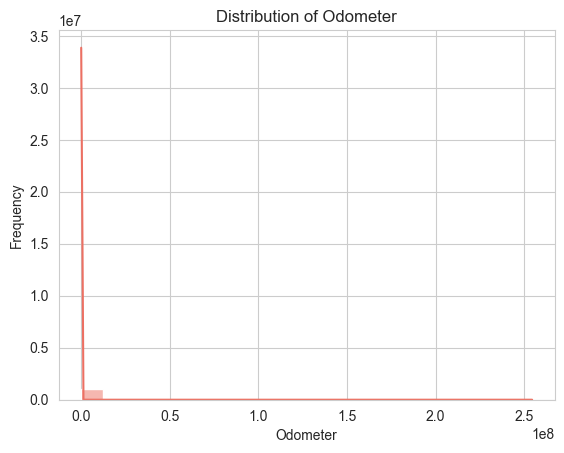

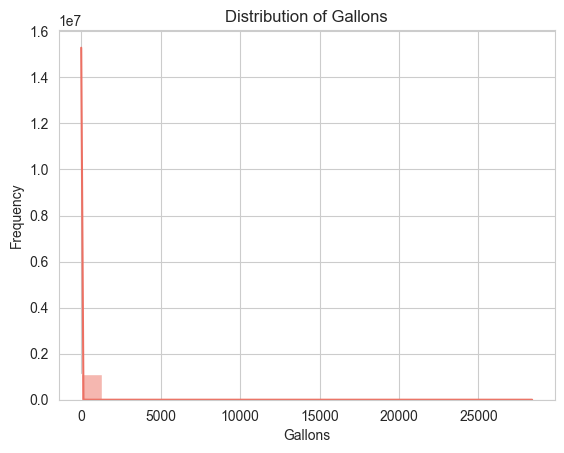

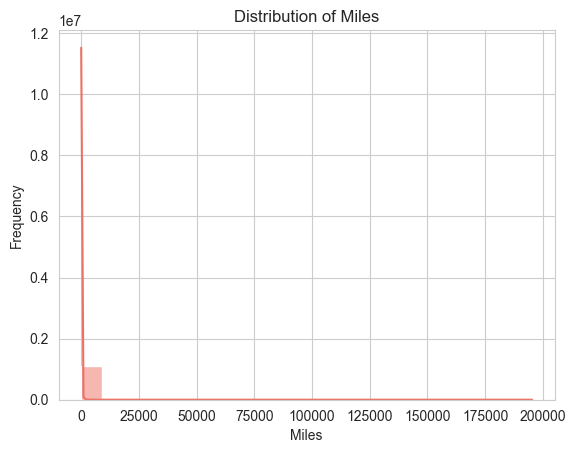

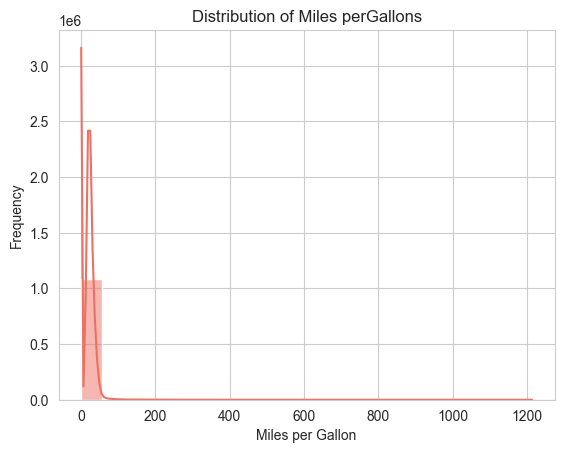

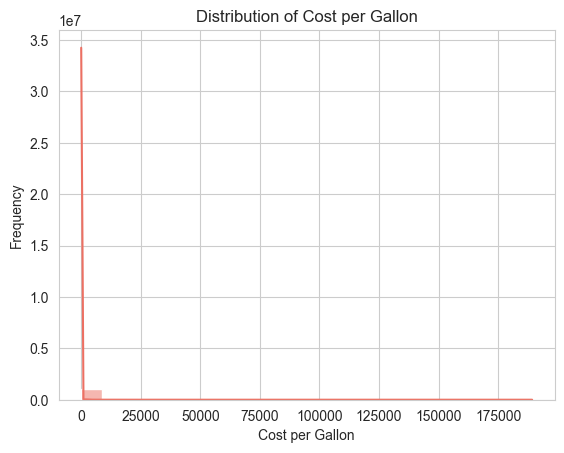

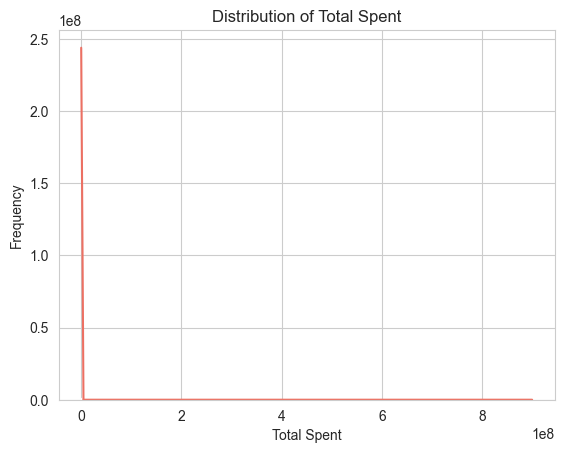

In [6]:
df.head()
sns.set_style('whitegrid')
sns.histplot(df['odometer'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['gallons'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Gallons')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['miles'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['mpg'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Miles perGallons')
plt.xlabel('Miles per Gallon')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['cost_per_gallon_float'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Cost per Gallon')
plt.xlabel('Cost per Gallon')
plt.ylabel('Frequency')
plt.show()

sns.set_style('whitegrid')
sns.histplot(df['total_spent_float'].dropna(),
             bins='sturges',
             stat='count',
             kde=True,
             color='#ec7063')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

We are unable to make meaningful observations about this graph due to the lack of a clear distribution. This suggests the presence of significant outliers that obscure our data, making it difficult to draw conclusions. Given the diverse range of currencies involved, it was anticipated that interpreting Total Spent and Cost per Gallon would be challenging. So we are going to use a boxplot to help us see the outliers and where they should be removed.

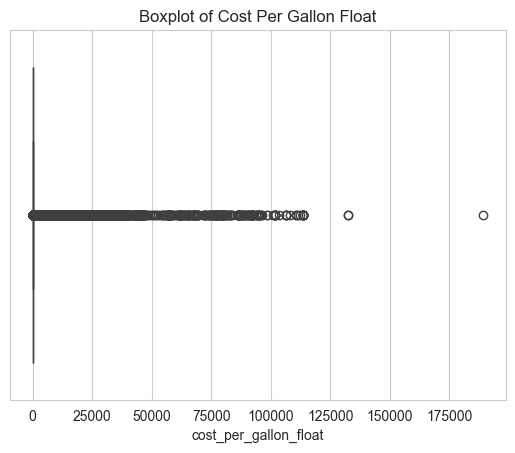

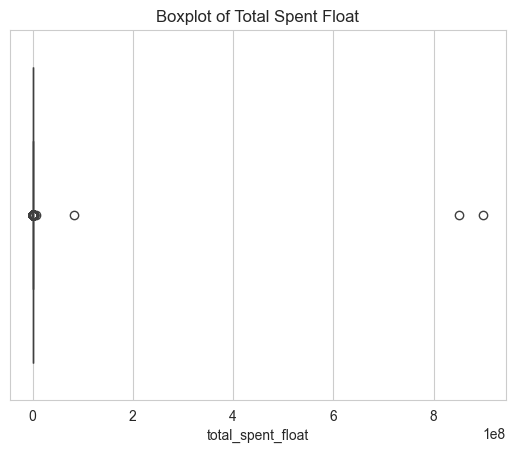

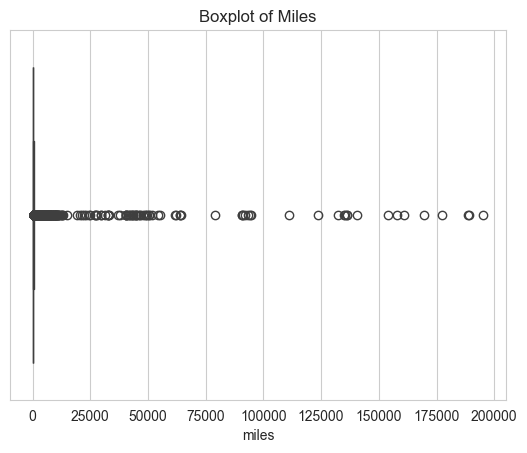

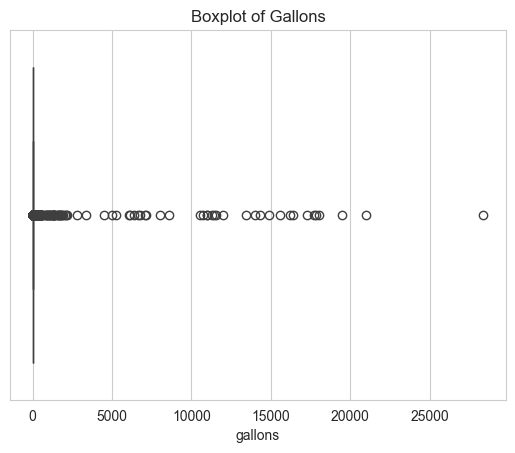

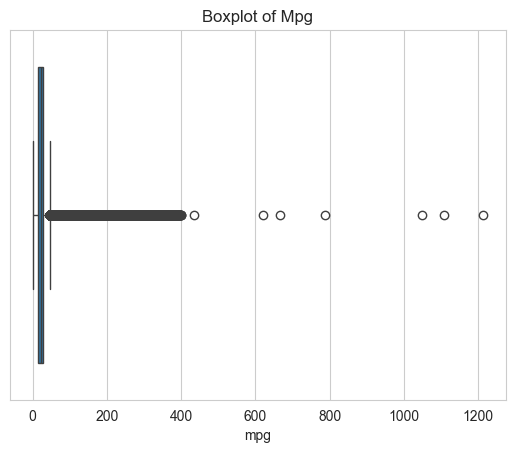

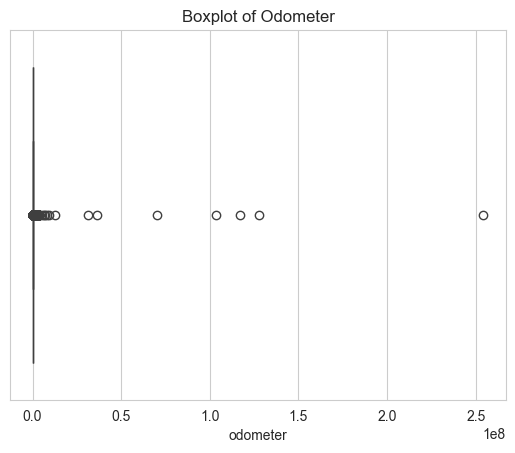

In [7]:
# List of columns to plot
columns = ['cost_per_gallon_float', 'total_spent_float', 'miles', 'gallons', 'mpg', 'odometer']

# Loop through each column and generate a boxplot
for column in columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column.replace("_", " ").title()}')
    plt.show()

After examining the boxplots, it is evident that there are significant outliers present in the data. These outliers skew the distributions, making it challenging to draw accurate and informed conclusions. Therefore, we filter out these extreme values using percentiles before conducting further analysis.

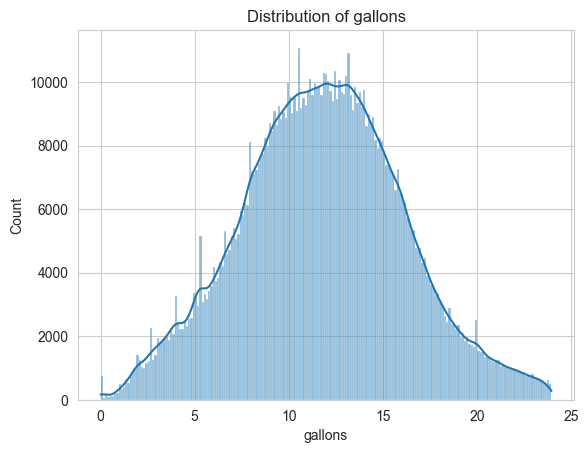

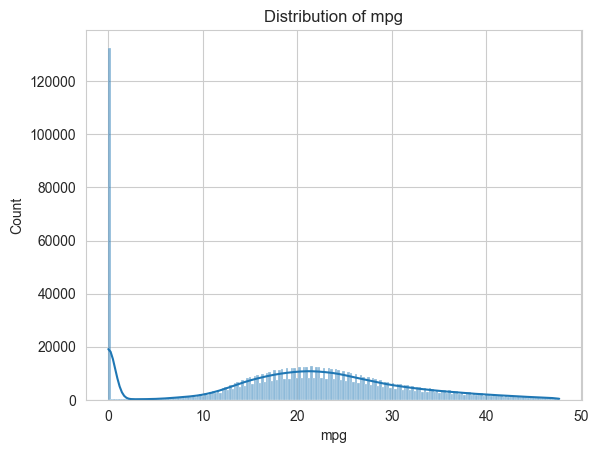

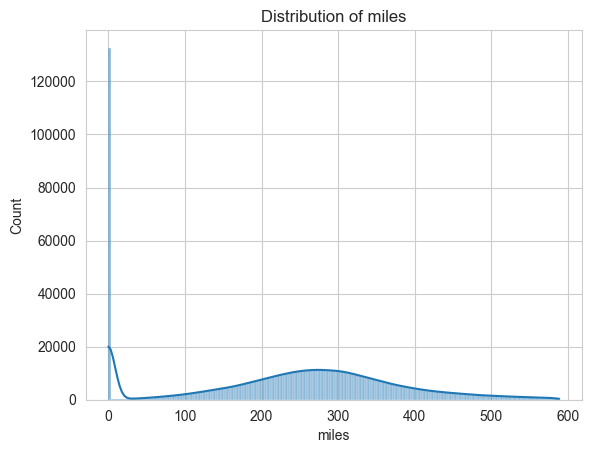

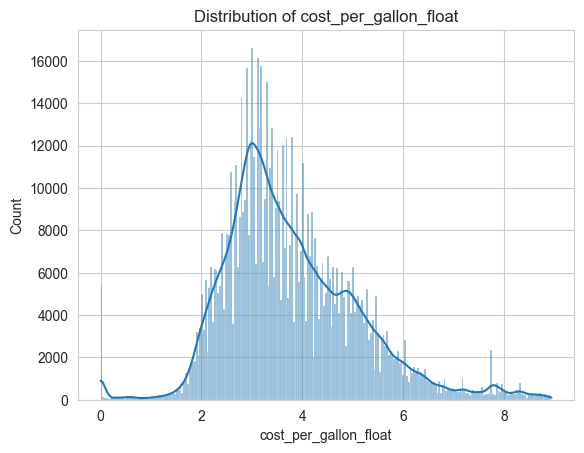

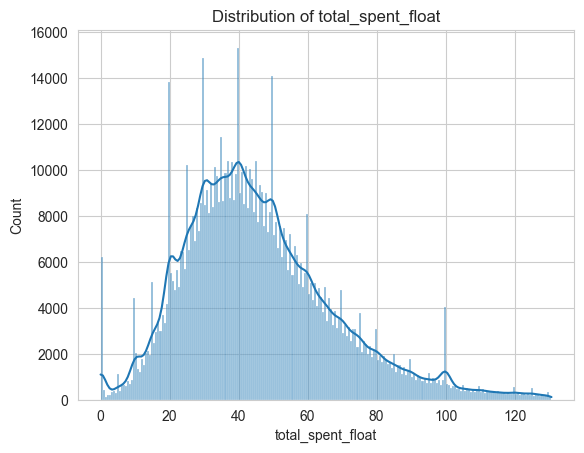

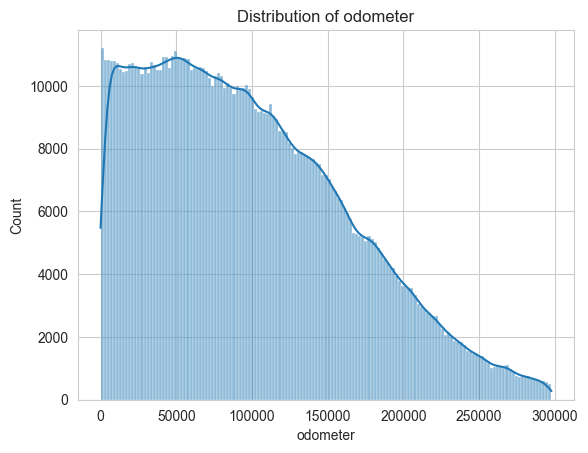

In [8]:
df_clean = df.dropna(subset=['gallons', 'mpg', 'miles', 'cost_per_gallon_float', 'total_spent_float', 'odometer'])

def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_clean[(df_clean[column] >= (Q1 - 1.5 * IQR)) & (df_clean[column] <= (Q3 + 1.5 * IQR))]

# Apply to each column
df_cleaned_gallons = remove_outliers_iqr(df_clean, 'gallons')
df_cleaned_mpg = remove_outliers_iqr(df_clean, 'mpg')
df_cleaned_miles = remove_outliers_iqr(df_clean, 'miles')
df_cleaned_cost_per_gallon = remove_outliers_iqr(df_clean, 'cost_per_gallon_float')
df_cleaned_total_spent = remove_outliers_iqr(df_clean, 'total_spent_float')
df_cleaned_odometer = remove_outliers_iqr(df_clean, 'odometer')

def plot_distribution(column, df_clean):
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot cleaned data distributions
plot_distribution('gallons', df_cleaned_gallons)
plot_distribution('mpg', df_cleaned_mpg)
plot_distribution('miles', df_cleaned_miles)
plot_distribution('cost_per_gallon_float', df_cleaned_cost_per_gallon)
plot_distribution('total_spent_float', df_cleaned_total_spent)
plot_distribution('odometer', df_cleaned_odometer)

5. Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense?

In [9]:
pd.set_option('display.float_format', '{:.3f}'.format)
print(df.describe())

           odometer     gallons         mpg       miles  \
count   1025716.000 1100660.000 1100660.000 1100660.000   
mean     103996.002      12.801      22.163     269.490   
std      340525.205      74.472      15.743     725.709   
min           0.000       0.000       0.000       0.000   
25%       45920.000       8.990      15.600     181.400   
50%       91882.000      11.954      21.800     267.058   
75%      146922.000      14.939      28.500     342.769   
max   254362100.000   28380.000    1214.300  195321.200   

       cost_per_gallon_float  total_spent_float  
count            1092086.000        1098583.000  
mean                 107.704           2745.571  
std                 1680.994        1183635.737  
min                    0.000              0.000  
25%                    2.999             32.460  
50%                    3.859             47.000  
75%                    5.300             70.785  
max               189270.590      899647469.000  


The summary statistics of the dataset reveal several significant data quality issues, making it challenging to draw accurate conclusions. Most notably, the presence of extremely high standard deviations and unrealistic maximum values across multiple columns suggests the presence of severe outliers and possible data entry errors. For instance, the odometer reading has a maximum value of 254 million miles, which is highly implausible, while the gallons, MPG, miles, cost per gallon, and total spent columns also exhibit similarly exaggerated maximum values. Additionally, minimum values of zero in several columns may indicate missing or misentered data. The monetary columns (such as cost per gallon and total spent) are particularly difficult to analyze due to the presence of over 100 different currencies in the dataset, which likely contributes to the extreme variability observed.